In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import from_numpy
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
torch.manual_seed(1) #랜덤 시드 고정


In [ ]:
#Data Load and preprocessing
# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self, xd, yd):
    self.x_data = xd
    self.y_data = yd

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = self.x_data[idx]
    y = self.y_data[idx]
    return x, y

data = pd.read_csv('/content/drive/MyDrive/Project/NLPModel/Data/EmbeddingTrainData2.csv')
data = data.to_numpy()
data = np.delete(data, 0, axis=0)
data = np.delete(data, 0, axis=1)

train_data = data[:18071]
test_data = data[18072:]

train_x = []
train_y = []
test_x = []
test_y = []

for line in train_data:
  train_x.append(line[:27])
  train_y.append(line[28])

for line in test_data:
  test_x.append(line[:27])
  test_y.append(line[28])



outer_temp_train = []
for line in train_x:
  temp = []
  for word in line:
    word = word.replace('[', '')
    word = word.replace(']', '')
    temp.append(list(map(float, word.split(','))))
  
  outer_temp_train.append(temp)

train_x = outer_temp_train

outer_temp_test = []
for line in test_x:
  temp = []
  for word in line:
    word = word.replace('[', '')
    word = word.replace(']', '')
    temp.append(list(map(float, word.split(','))))
  
  outer_temp_test.append(temp)

test_x = outer_temp_test

train_x = torch.tensor(train_x)
train_y = torch.tensor(train_y)
test_x = torch.tensor(test_x)
test_y = torch.tensor(test_y)

dataset = CustomDataset(train_x, train_y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)



In [ ]:
print(train_y)

tensor([8, 8, 8,  ..., 9, 9, 9])


In [ ]:
# print(train_x.shape)
# print(len(train_x))
# print(train_y.shape)
# print(len(train_y))

print(train_x.shape)

torch.Size([18071, 27, 1])


In [ ]:
model = nn.Conv2d(
    in_channels = 1,
    out_channels = 1,
    kernel_size = 1,
    groups = 1,
    stride = 1
)
# model = nn.Linear(27, 8)
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 500
for epoch in tqdm(range(nb_epochs + 1)):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples
    # H(x) 계산
    hypothesis = model(x_train)
    # cost 계산
    cost = F.cross_entropy(hypothesis, y_train.unsqueeze(0))
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 20번마다 로그 출력
    # if epoch % 100 == 0:
    #   prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    #   correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    #   accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
    #   print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
    #     epoch, nb_epochs, cost.item(), accuracy * 100,
    #   ))

100%|██████████| 501/501 [46:59<00:00,  5.63s/it]


In [ ]:
torch.save(model, '/content/drive/MyDrive/Project/NLPModel/Data/SoftmaxModel.pt')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/NLPModel/Data/EmbeddingTrainData2.csv')
data = data.to_numpy()
data = np.delete(data, 0, axis=0)
data = np.delete(data, 0, axis=1)

train_data = data[:18071]
test_data = data[18072:]

train_x = []
train_y = []
test_x = []
test_y = []

for line in train_data:
  train_x.append(line[:27])
  train_y.append(line[28])

for line in test_data:
  test_x.append(line[:27])
  test_y.append(line[28])



outer_temp_train = []
for line in train_x:
  temp = []
  for word in line:
    word = word.replace('[', '')
    word = word.replace(']', '')
    temp.append(list(map(float, word.split(','))))
  
  outer_temp_train.append(temp)

train_x = outer_temp_train

outer_temp_test = []
for line in test_x:
  temp = []
  for word in line:
    word = word.replace('[', '')
    word = word.replace(']', '')
    temp.append(list(map(float, word.split(','))))
  
  outer_temp_test.append(temp)

test_x = outer_temp_test

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
print(type(train_y))

<class 'numpy.ndarray'>


In [ ]:
model = Sequential()
model.add(Dense(11, input_dim=27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y.tolist(), epochs=200, batch_size=1, validation_data=(test_x, test_y.tolist()))

Epoch 1/200
18071/18071 [==============================] - 39s 2ms/step - loss: 1.4450 - accuracy: 0.2721 - val_loss: 1.3913 - val_accuracy: 0.2777
Epoch 2/200
18071/18071 [==============================] - 35s 2ms/step - loss: 1.4182 - accuracy: 0.2895 - val_loss: 1.3884 - val_accuracy: 0.2644
Epoch 3/200
18071/18071 [==============================] - 35s 2ms/step - loss: 1.4173 - accuracy: 0.2857 - val_loss: 1.4156 - val_accuracy: 0.2580
Epoch 4/200
18071/18071 [==============================] - 35s 2ms/step - loss: 1.4153 - accuracy: 0.2896 - val_loss: 1.3888 - val_accuracy: 0.3016
Epoch 5/200
18071/18071 [==============================] - 35s 2ms/step - loss: 1.4150 - accuracy: 0.2910 - val_loss: 1.3930 - val_accuracy: 0.2651
Epoch 6/200
18071/18071 [==============================] - 35s 2ms/step - loss: 1.4141 - accuracy: 0.2893 - val_loss: 1.3892 - val_accuracy: 0.2996
Epoch 7/200
18071/18071 [==============================] - 35s 2ms/step - loss: 1.4131 - accuracy: 0.2888 - val_

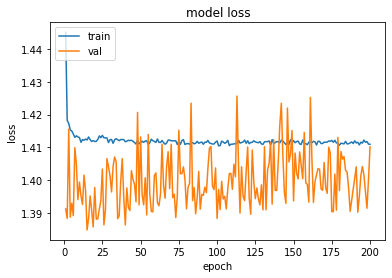

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(test_x, test_y.tolist())[1]))
model.save('softmax.h5')

142/142 [==============================] - 1s 2ms/step - loss: 1.4101 - accuracy: 0.2405

 테스트 정확도: 0.2405
